# Written Investigation
Cluster Analysis of Homelessness types in Mesa, Arizona

## Install packages

In [1]:
! pip install plotnine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 8.5 MB/s eta 0:00:00


In [2]:
! pip install kmodes

In [3]:
import pandas as pd

import matplotlib.cm
from matplotlib import colors
import matplotlib.pyplot as plt # For plotting
import numpy as np              # For working with numerical data
from plotnine import *
import plotnine

from sklearn.preprocessing import RobustScaler
import sklearn
from kmodes.kprototypes import KPrototypes
from scipy.stats import chi2_contingency
import seaborn as sns

## Import Data -Mesa-

In [4]:
# read in data for mesa
mesa = pd.read_csv("Unsheltered_Point_In_Time__PIT__Count_Details_Mesa_Only.csv")

In [5]:
mesa.head()

,MagId,OBJECTID,SurveyType,globalid,parentglobalid,Household Y/N,Household Type,HH Adults & Kids,HH Adults only,HH Child Only,...,High_Low,Grid_Issue,Location_desc,Homeless,Reason,Reason_Other,Substance,Chronic,Age Type,Geolocation
0,3017,1462,Observation,{C65A31F9-CCB3-45F9-B473-BB88D0EAB525},{B27AB30A-1735-4157-9BF1-7ACF93220DAE},NaN,Adults Only,NaN,True,NaN,...,NaN,NaN,NaN,Definitely,no_survey,NaN,NaN,NaN,Adults,POINT (-111.8554685 33.41537737)
1,1036,1037,Interview,{6EA6221C-F4BE-4498-BEA8-6E9500110DCF},{6D9606E0-E3C7-4E59-8E6C-C74127DFE177},NaN,Adults Only,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adults,POINT (-111.8334689 33.40739482)
2,994,995,Interview,{45619E85-326C-4F23-BA3A-BFE5FACF7638},{93009576-8D0D-423C-B13E-00DC3612DF38},NaN,Adults Only,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adults,POINT (-111.8334516 33.4073513)
3,65,65,Interview,{4659F2D3-27FE-4CEE-B352-B767C2706C9F},{32DDB967-CACE-473B-836F-D70946A8DF4F},NaN,Adults Only,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Seniors,POINT (-111.8262637 33.4142765)
4,701,702,Interview,{A8BF1B94-0851-4E1A-B743-A4A072021CC8},{3D9AE6DA-8D65-4082-B563-51457E391792},True,Adults Only,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Older Adults,POINT (-111.8233899 33.4081238)


## Clean Data

In [6]:
# remove rows without data on whether homelessness is experienced for the first time
mesa_subset = mesa.dropna(subset = ['First Time Homelessness'])

In [7]:
mesa_subset.head()

,MagId,OBJECTID,SurveyType,globalid,parentglobalid,Household Y/N,Household Type,HH Adults & Kids,HH Adults only,HH Child Only,...,High_Low,Grid_Issue,Location_desc,Homeless,Reason,Reason_Other,Substance,Chronic,Age Type,Geolocation
1,1036,1037,Interview,{6EA6221C-F4BE-4498-BEA8-6E9500110DCF},{6D9606E0-E3C7-4E59-8E6C-C74127DFE177},NaN,Adults Only,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adults,POINT (-111.8334689 33.40739482)
2,994,995,Interview,{45619E85-326C-4F23-BA3A-BFE5FACF7638},{93009576-8D0D-423C-B13E-00DC3612DF38},NaN,Adults Only,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adults,POINT (-111.8334516 33.4073513)
3,65,65,Interview,{4659F2D3-27FE-4CEE-B352-B767C2706C9F},{32DDB967-CACE-473B-836F-D70946A8DF4F},NaN,Adults Only,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Seniors,POINT (-111.8262637 33.4142765)
4,701,702,Interview,{A8BF1B94-0851-4E1A-B743-A4A072021CC8},{3D9AE6DA-8D65-4082-B563-51457E391792},True,Adults Only,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Older Adults,POINT (-111.8233899 33.4081238)
5,1070,1071,Interview,{4ED4BC97-0465-4923-A1DC-3B1A6CEF031D},{74AC4BC1-2098-4090-BA20-2F7311ADAC58},NaN,Adults Only,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Older Adults,POINT (-111.6837261 33.42181642)


In [8]:
# count the number of rows
mesa_subset.shape

(191, 72)

In [9]:
# set the index of the dataframe with magid column
mesa_subset = mesa_subset.set_index('MagId')

In [10]:
mesa_subset.head(5)

,OBJECTID,SurveyType,globalid,parentglobalid,Household Y/N,Household Type,HH Adults & Kids,HH Adults only,HH Child Only,Veteran HH,...,High_Low,Grid_Issue,Location_desc,Homeless,Reason,Reason_Other,Substance,Chronic,Age Type,Geolocation
MagId,,,,,,,,,,,,,,,,,,,,,
1036,1037,Interview,{6EA6221C-F4BE-4498-BEA8-6E9500110DCF},{6D9606E0-E3C7-4E59-8E6C-C74127DFE177},NaN,Adults Only,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adults,POINT (-111.8334689 33.40739482)
994,995,Interview,{45619E85-326C-4F23-BA3A-BFE5FACF7638},{93009576-8D0D-423C-B13E-00DC3612DF38},NaN,Adults Only,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adults,POINT (-111.8334516 33.4073513)
65,65,Interview,{4659F2D3-27FE-4CEE-B352-B767C2706C9F},{32DDB967-CACE-473B-836F-D70946A8DF4F},NaN,Adults Only,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Seniors,POINT (-111.8262637 33.4142765)
701,702,Interview,{A8BF1B94-0851-4E1A-B743-A4A072021CC8},{3D9AE6DA-8D65-4082-B563-51457E391792},True,Adults Only,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Older Adults,POINT (-111.8233899 33.4081238)
1070,1071,Interview,{4ED4BC97-0465-4923-A1DC-3B1A6CEF031D},{74AC4BC1-2098-4090-BA20-2F7311ADAC58},NaN,Adults Only,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Older Adults,POINT (-111.6837261 33.42181642)


### Create column for days since first experienced homelessness

In [11]:
# extract only the date information from the CreationDate_Converted (the day the data was collected)
mesa_subset["CreationDate_Converted_extract"] = mesa_subset['CreationDate_Converted'].str.split(' ').str[0]


In [12]:
# check if it is done correctly
print(mesa_subset["CreationDate_Converted_extract"])

MagId
1036    01/25/2022
994     01/25/2022
65      01/25/2022
701     01/25/2022
1070    01/25/2022
           ...    
770     01/25/2022
917     01/25/2022
167     01/25/2022
1280    01/25/2022
531     01/25/2022
Name: CreationDate_Converted_extract, Length: 191, dtype: object


In [13]:
# create new column converting the column into datetime type
mesa_subset['CreationDate_Converted_datetime'] = pd.to_datetime(mesa_subset["CreationDate_Converted_extract"], format='%m/%d/%Y', errors='coerce')

In [14]:
# check if it is done correctly
print(mesa_subset["CreationDate_Converted_datetime"])

MagId
1036   2022-01-25
994    2022-01-25
65     2022-01-25
701    2022-01-25
1070   2022-01-25
          ...    
770    2022-01-25
917    2022-01-25
167    2022-01-25
1280   2022-01-25
531    2022-01-25
Name: CreationDate_Converted_datetime, Length: 191, dtype: datetime64[ns]


In [15]:
# extract only the date information from the Date Homeless Began 
mesa_subset["Date_Homeless_Began_extract"] = mesa_subset['Date Homeless Began'].str.split(' ').str[0]

In [16]:
# check if it is done correctly
print(mesa_subset["Date_Homeless_Began_extract"])

MagId
1036    01/30/2021
994     09/30/2021
65      01/03/2020
701     06/01/2020
1070    08/07/2021
           ...    
770     12/02/2021
917     12/12/2021
167     01/25/2022
1280    01/01/1985
531     11/12/2020
Name: Date_Homeless_Began_extract, Length: 191, dtype: object


In [17]:
# create new column converting the column into datetime type
mesa_subset['Date_Homeless_Began_datetime'] = pd.to_datetime(mesa_subset["Date_Homeless_Began_extract"], format='%m/%d/%Y', errors='coerce')

In [18]:
# check if it is done correctly
print(mesa_subset["Date_Homeless_Began_datetime"])

MagId
1036   2021-01-30
994    2021-09-30
65     2020-01-03
701    2020-06-01
1070   2021-08-07
          ...    
770    2021-12-02
917    2021-12-12
167    2022-01-25
1280   1985-01-01
531    2020-11-12
Name: Date_Homeless_Began_datetime, Length: 191, dtype: datetime64[ns]


In [19]:
# create column counting the days between when homelessness started and date of survey
mesa_subset['Homeless_days'] = (mesa_subset["CreationDate_Converted_datetime"] - mesa_subset["Date_Homeless_Began_datetime"]).dt.days

### Subset data for cluster analysis

In [20]:
# subset to columns of interest for cluster analysis - First time homeless, How many times homeless
mesa_cluster = mesa_subset[["First Time Homelessness", "How many times homeless", "Homeless_days"]]

In [21]:
# check dataset
mesa_cluster.head(5)

,First Time Homelessness,How many times homeless,Homeless_days
MagId,,,
1036,True,NaN,360.0
994,False,one,117.0
65,False,four+,753.0
701,False,four+,603.0
1070,True,NaN,171.0


In [22]:
# count number of nas is each column
print(mesa_cluster.isna().sum())

First Time Homelessness     0
How many times homeless    96
Homeless_days              14
dtype: int64


In [23]:
# remove rows with nas in Homeless_days
mesa_cluster.dropna(subset=['Homeless_days'], inplace = True)

/tmp/ipykernel_243/346599689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
# count the number of rows in data set
mesa_cluster.shape

(177, 3)

In [25]:
# count number of nas is each column
print(mesa_cluster.isna().sum())

First Time Homelessness     0
How many times homeless    84
Homeless_days               0
dtype: int64


In [26]:
# replace NAs in 'how many times homeless' column
mesa_cluster['How many times homeless'] = mesa_cluster['How many times homeless'].fillna('one')

/tmp/ipykernel_243/1147925255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [27]:
# check data again
mesa_cluster.head(5)

,First Time Homelessness,How many times homeless,Homeless_days
MagId,,,
1036,True,one,360.0
994,False,one,117.0
65,False,four+,753.0
701,False,four+,603.0
1070,True,one,171.0


## Data exploration

In [28]:
# First Time Homelessness
print(mesa_cluster.groupby('First Time Homelessness').size())

First Time Homelessness
False    93
True     84
dtype: int64


In [29]:
# How many times homeless
print(mesa_cluster.groupby('How many times homeless').size())

How many times homeless
DK/REF     22
four+      29
one       105
three      10
two        11
dtype: int64


In [30]:
# remove DK/REF (don't know/refuse)
mesa_cluster = mesa_cluster[mesa_cluster["How many times homeless"]!= "DK/REF"]

In [31]:
# check the number of rows
mesa_cluster.shape

(155, 3)

In [32]:
# Homeless days
mean_homeless_days = mesa_cluster['Homeless_days'].mean()
print(mean_homeless_days)
std_homeless_days = mesa_cluster['Homeless_days'].std()
print(std_homeless_days)

883.6967741935484
1567.418936258834


(0.0, 0.002)

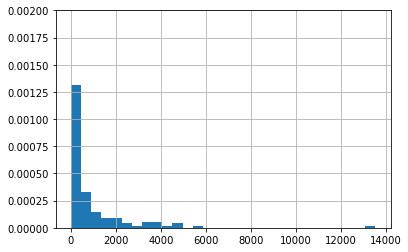

In [33]:
# check distribution
bottom_homeless_days = mesa_cluster['Homeless_days'].min()-1
top_homeless_days = mesa_cluster['Homeless_days'].max()+1
x_range = [bottom_homeless_days, top_homeless_days]
y_range = [0,0.002]
plt.figure(1)
mesa_cluster['Homeless_days'].hist(range=x_range, bins=30, density = True, stacked = True)
plt.ylim(y_range) 

In [34]:
# graph shows a positive skew
# log transformation for appropriate clustering
scaler = RobustScaler()
mesa_cluster['cbrt_homeless_days'] = scaler.fit_transform(mesa_cluster['Homeless_days'].values.reshape(-1,1))

In [35]:
# cbrt_homeless_days
mean_cbrt_homeless_days = mesa_cluster['cbrt_homeless_days'].mean()
print(mean_cbrt_homeless_days)
std_cbrt_homeless_days = mesa_cluster['cbrt_homeless_days'].std()
print(std_cbrt_homeless_days)

0.5996808149405776
1.6499146697461406


/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


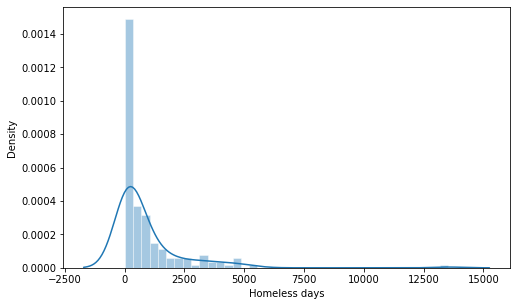

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4.8))
sns.set(style = 'whitegrid')
sns.distplot(ax=ax, a=mesa_cluster["Homeless_days"])
ax.set(xlabel='Homeless days')
plt.savefig('distribtion.png')

In [37]:
mesa_cluster.skew(axis = 0, skipna = True)

/tmp/ipykernel_243/976225524.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


First Time Homelessness   -0.169984
Homeless_days              4.264571
cbrt_homeless_days         4.264571
dtype: float64

In [38]:
mesa_cluster.describe()

,Homeless_days,cbrt_homeless_days
count,155.000000,155.000000
mean,883.696774,0.599681
std,1567.418936,1.649915
min,0.000000,-0.330526
25%,34.500000,-0.294211
50%,314.000000,0.000000
75%,984.500000,0.705789
max,13538.000000,13.920000


In [39]:
# check data layout
mesa_cluster.head(5)

,First Time Homelessness,How many times homeless,Homeless_days,cbrt_homeless_days
MagId,,,,
1036,True,one,360.0,0.048421
994,False,one,117.0,-0.207368
65,False,four+,753.0,0.462105
701,False,four+,603.0,0.304211
1070,True,one,171.0,-0.150526


In [40]:
# drop original column of homeless_days for cluster analysis
mesa_cluster.drop("Homeless_days", axis=1, inplace = True)

In [41]:
# check data layout
mesa_cluster

,First Time Homelessness,How many times homeless,cbrt_homeless_days
MagId,,,
1036,True,one,0.048421
994,False,one,-0.207368
65,False,four+,0.462105
701,False,four+,0.304211
1070,True,one,-0.150526
...,...,...,...
770,False,four+,-0.273684
917,False,three,-0.284211
167,True,one,-0.330526


In [42]:
mesa_cluster['First Time Homelessness'].value_counts(normalize=True) * 100

True     54.193548
False    45.806452
Name: First Time Homelessness, dtype: float64

In [43]:
mesa_cluster['How many times homeless'].value_counts(normalize=True) * 100

one      67.741935
four+    18.709677
two       7.096774
three     6.451613
Name: How many times homeless, dtype: float64

In [44]:
mesa_cluster.dtypes

First Time Homelessness     object
How many times homeless     object
cbrt_homeless_days         float64
dtype: object

In [45]:
mesa_cluster["First Time Homelessness"] = mesa_cluster["First Time Homelessness"].astype('category')

## Cluster Analysis - kprototype

In [46]:
# Convert dataframe to matrix
mesa_cluster_matrix = mesa_cluster.to_numpy()
mesa_cluster_matrix

array([[True, 'one', 0.04842105263157895],
       [False, 'one', -0.2073684210526316],
       [False, 'four+', 0.46210526315789474],
       [False, 'four+', 0.3042105263157895],
       [True, 'one', -0.15052631578947367],
       [True, 'one', -0.2873684210526316],
       [True, 'one', -0.2863157894736842],
       [False, 'one', 2.3789473684210525],
       [True, 'one', -0.1968421052631579],
       [True, 'one', -0.2578947368421053],
       [False, 'three', 0.848421052631579],
       [True, 'one', -0.30526315789473685],
       [False, 'one', -0.21894736842105264],
       [True, 'one', 0.4010526315789474],
       [True, 'one', 4.685263157894737],
       [True, 'one', -0.3231578947368421],
       [True, 'one', -0.30105263157894735],
       [False, 'four+', 3.154736842105263],
       [True, 'one', 2.002105263157895],
       [True, 'one', 0.014736842105263158],
       [True, 'one', 0.848421052631579],
       [False, 'one', -0.2863157894736842],
       [False, 'one', -0.33052631578947367],
 

In [47]:
# create a list for the index of categorical index
categorical_index = [0,1]

### validation of k 

In [75]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 11):
    try:
        kprototype_cost = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype_cost.fit_predict(mesa_cluster_matrix, categorical = categorical_index)
        cost.append(kprototype_cost.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 11), 'Cost':cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
p_1 = (ggplot(data = df_cost)+
geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost')) +
    scale_x_continuous(breaks=range(1, 11, 1)) +
    xlab('Number of Clusters k')+
    ylab('Cost'))

p_1.save(filename = 'test3.png', height=3.6, width=6, units = 'in', dpi=1000)

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10


/opt/conda/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6 x 3.6 in image.
/opt/conda/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: test3.png


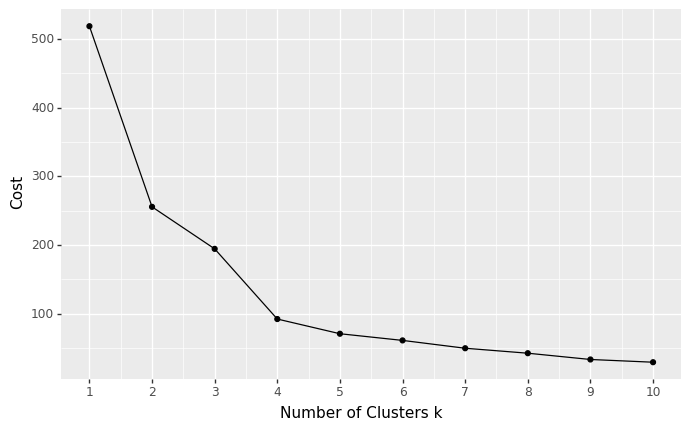

<ggplot: (8783068193618)>

In [68]:
p_1

In [76]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 4, init = 'Huang', random_state = 0)
kprototype.fit_predict(mesa_cluster_matrix, categorical = categorical_index)

array([0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0,
       1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0,
       2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 3,
       2], dtype=uint16)

In [74]:
# Cluster centorid
kprototype.cluster_centroids_

array([['-0.04479804161566704', 'True', 'one'],
       ['3.2845614035087713', 'False', 'one'],
       ['13.919999999999996', 'False', 'four+'],
       ['0.29590145576707716', 'False', 'four+']], dtype='<U32')

In [53]:
mesa_cluster["Cluster group"] = kprototype.labels_

In [55]:
mesa_cluster["Cluster group"] = mesa_cluster["Cluster group"] + 1

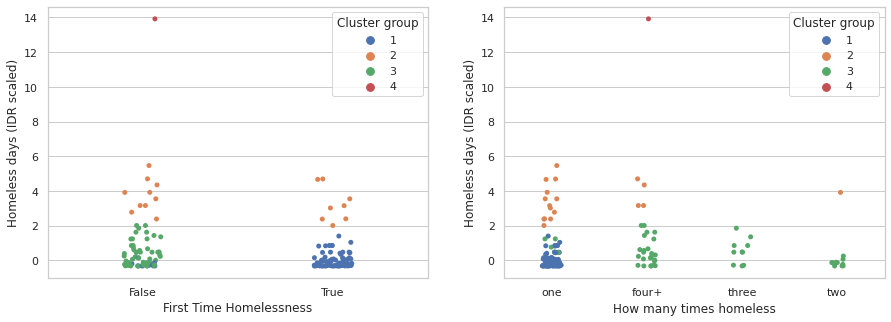

In [56]:
# create figure 
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.set(style = 'whitegrid')
sns.stripplot(ax=axes[0], x="First Time Homelessness", y="cbrt_homeless_days", hue="Cluster group", data= mesa_cluster)
sns.stripplot(ax=axes[1], x="How many times homeless", y="cbrt_homeless_days", hue="Cluster group", data= mesa_cluster)
axes[0].set(ylabel='Homeless days (IDR scaled)')
axes[1].set(ylabel='Homeless days (IDR scaled)')
plt.savefig('stripplot.png')

In [57]:
mesa_cluster.groupby(['Cluster group']).size()

Cluster group
1    87
2    18
3    49
4     1
dtype: int64

In [58]:
mesa_subset = mesa_subset.merge(mesa_cluster["Cluster group"], on = "MagId", how = "inner")

In [63]:
cluster_0 = mesa_subset[mesa_subset['Cluster group'] == 1]
cluster_1 = mesa_subset[mesa_subset['Cluster group'] == 2]
cluster_2 = mesa_subset[mesa_subset['Cluster group'] == 3]

In [64]:
cluster_0['Homeless_days'].mean()

273.4712643678161

In [65]:
cluster_1['Homeless_days'].mean()

3645.6111111111113

In [66]:
cluster_2['Homeless_days'].mean()

694.3265306122449